# Introduction 

The objective of this study is to classify medical images using the Convolutional Neural Network(CNN) Model.

CNN model with a well-processed dataset of medical images. This model can be used to classify medical images based on categories provided as per the training dataset.

![Medical](https://www.ucsfhealth.org/-/media/project/ucsf/ucsf-health/medical-tests/hero/x-ray-skeleton-2x.jpg?h=1112&w=2880&hash=CFA177B5092DFF1B3AC225908DF7C476)

## About the dataset

This dataset was developed in 2017 by Arturo Polanco Lozano. It is also known as the MedNIST dataset for radiology and medical imaging. For the preparation of this dataset, images have been gathered from several datasets, namely, TCIA, the RSNA Bone Age Challange, and the NIH Chest X-ray dataset.

This dataset contains 58954 medical images belonging to 6 categories — AbdomenCT(10000 images), HeadCT(10000 images), Hand(10000 images), CXR(10000 images), CXR(10000 images), BreastMRI(8954 images), ChestCT(10000 images).



## Importing the dataset 


In [1]:
!wget -N "https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/MedNIST.zip"
!unzip -qo "MedNIST.zip"
!rm "MedNIST.zip"

--2023-01-21 17:51:52--  https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/MedNIST.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.156.47
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.156.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110557154 (105M) [application/x-zip-compressed]
Saving to: ‘MedNIST.zip’

MedNIST.zip         100%[===================>] 105.43M  12.5MB/s    in 25s     

2023-01-21 17:52:18 (4.17 MB/s) - ‘MedNIST.zip’ saved [110557154/110557154]



## Allocating test and train directories


In [2]:
import os
import numpy as np
import pandas as pd
import random, datetime, shutil, math

In [3]:
train_dir = '/content/Medical/Medical_train'
test_dir = '/content/Medical/Medical_test'

In [4]:
# making a validation dataset
os.mkdir('/content/Medical/Medical_val')
os.mkdir('/content/Medical/Medical_val/HeadCT')
os.mkdir('/content/Medical/Medical_val/ChestCT')
os.mkdir('/content/Medical/Medical_val/AbdomenCT')
os.mkdir('/content/Medical/Medical_val/BreastMRI')
os.mkdir('/content/Medical/Medical_val/Hand')
os.mkdir('/content/Medical/Medical_val/CXR')


In [5]:
val_dir = '/content/Medical/Medical_val'

## Validation Data Creation

Validation data is used to evaluate the performance of a model during the training process. It helps to prevent overfitting, which is when a model becomes too specialized to the training data and performs poorly on new, unseen data. By using validation data to evaluate the model's performance, developers can identify when the model is starting to overfit and make adjustments to the model or training process accordingly. Additionally, validation data can be used to compare different models and select the one that performs the best on the validation set before deploying it to production.

In [6]:
def prep_val_data(med, train_dir, val_dir):
  pop = os.listdir(train_dir+'/'+med)
  test_data=random.sample(pop, 1500)

  #print(test_data)
  for f in test_data:
    shutil.copy(train_dir+'/'+med+'/'+f, val_dir+'/'+med+'/')

In [7]:
for medi in os.listdir(train_dir):
  prep_val_data(medi, train_dir, val_dir)

In [8]:
#for train
target_classes = os.listdir(train_dir)
num_classes = len(target_classes)
print('Number of target classes:', num_classes)
print(list(enumerate(target_classes)))

Number of target classes: 6
[(0, 'HeadCT'), (1, 'ChestCT'), (2, 'AbdomenCT'), (3, 'BreastMRI'), (4, 'Hand'), (5, 'CXR')]


In [9]:
#for validation
target_classes = os.listdir(train_dir)
num_classes = len(target_classes)
print('Number of target classes:', num_classes)
print(list(enumerate(target_classes)))

Number of target classes: 6
[(0, 'HeadCT'), (1, 'ChestCT'), (2, 'AbdomenCT'), (3, 'BreastMRI'), (4, 'Hand'), (5, 'CXR')]


In [10]:
# for test
target_classes = os.listdir(val_dir)
num_classes = len(target_classes)
print('Number of target classes:', num_classes)
print(list(enumerate(target_classes)))

Number of target classes: 6
[(0, 'HeadCT'), (1, 'ChestCT'), (2, 'AbdomenCT'), (3, 'BreastMRI'), (4, 'Hand'), (5, 'CXR')]


## Assigning training and test set distributions

In [11]:
training_set_distribution = [len(os.listdir(os.path.join(train_dir, dir))) for dir in os.listdir(train_dir)]
print(training_set_distribution)
val_set_distribution = [len(os.listdir(os.path.join(val_dir, dir))) for dir in os.listdir(val_dir)]
print(val_set_distribution)

testing_set_distribution = [len(os.listdir(os.path.join(test_dir, dir))) for dir in os.listdir(test_dir)]
print(testing_set_distribution)

[10000, 10000, 10000, 8954, 10000, 10000]
[1500, 1500, 1500, 1500, 1500, 1500]
[2000, 2000, 2000, 2000, 2000, 2000]


## Data Preprocessing

Data preprocessing is an important step in training a CNN model using Keras. Some common preprocessing steps include:

- Data normalization: This is used to ensure that all input data has the same scale. This can be done by dividing the data by the maximum value or by using the mean and standard deviation of the data.

- Data augmentation: This is used to increase the size of the training dataset by applying random transformations to the existing images. This can include rotation, flipping, and zoom.

- One-hot encoding: One-hot encoding is used to convert categorical data into a binary format that can be understood by the model.

- Reshaping: This is used to convert the input data into the shape that the model expects. This usually involves converting the data into a 4-dimensional array with dimensions (batch size, height, width, channels).

- Splitting the data: This is used to split the data into training and validation sets.

In [12]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [13]:
image_size = (32, 32, 3)

datagen=ImageDataGenerator(rescale = 1./255,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           )

In [14]:
training_set=datagen.flow_from_directory(train_dir,
                                         target_size=image_size[:2],
                                         batch_size=32,
                                         class_mode='categorical',
                                         shuffle=False
                                         #color_mode='rgb'
                                         )

Found 58954 images belonging to 6 classes.


In [15]:
validation_set=datagen.flow_from_directory(val_dir,
                                           target_size=image_size[:2],
                                           batch_size=32,
                                           class_mode='categorical',
                                           shuffle=False
                                           )

Found 9000 images belonging to 6 classes.


In [16]:
test_set=datagen.flow_from_directory(test_dir,
                                           target_size=image_size[:2],
                                           batch_size=32,
                                           class_mode='categorical',
                                           shuffle=False
                                           )

Found 12000 images belonging to 6 classes.


## Importing and Setting Callbacks

Callbacks are functions in Keras that are called at certain points during the training process. They can be used to perform tasks such as saving the model's weights, early stopping the training, or reducing the learning rate.

Examples of callbacks include:

- ModelCheckpoint: which saves the model's weights after each epoch.

- EarlyStopping: which stops the training process when the model's performance on the validation set stops improving.

- ReduceLROnPlateau: which reduces the learning rate when the model's performance on the validation set stops improving.

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [18]:
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=7)
ckpt = ModelCheckpoint("modelMedicalMNIST.h5", monitor='acc', verbose=1, save_best_only=True, mode='max')
rlp = ReduceLROnPlateau(monitor='acc', patience=3, verbose=1)

## Defining CNN Model

In [19]:
def cnn(image_size, num_classes):
    classifier = Sequential()
    classifier.add(Conv2D(64, (5, 5), input_shape=image_size, activation='relu', padding='same'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Flatten())
    classifier.add(Dense(num_classes, activation = 'softmax'))
    classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    return classifier

neuralnetwork_cnn = cnn(image_size, num_classes)
neuralnetwork_cnn.summary()
#plot_model(neuralnetwork_cnn, show_shapes=True) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 6)                 4

## Model Fitting to Data

In [20]:
history = neuralnetwork_cnn.fit(
    training_set,
    validation_data=validation_set,
    callbacks=[es, ckpt, rlp],
    epochs = 5, 
)

Epoch 1/5
1842/1843 [============================>.] - ETA: 0s - loss: 0.2049 - acc: 0.9233
Epoch 1: acc improved from -inf to 0.92330, saving model to modelMedicalMNIST.h5
1843/1843 [==============================] - 76s 36ms/step - loss: 0.2048 - acc: 0.9233 - val_loss: 0.0290 - val_acc: 0.9923 - lr: 0.0010
Epoch 2/5
1843/1843 [==============================] - ETA: 0s - loss: 0.0654 - acc: 0.9820
Epoch 2: acc improved from 0.92330 to 0.98195, saving model to modelMedicalMNIST.h5
1843/1843 [==============================] - 62s 34ms/step - loss: 0.0654 - acc: 0.9820 - val_loss: 0.0151 - val_acc: 0.9968 - lr: 0.0010
Epoch 3/5
1843/1843 [==============================] - ETA: 0s - loss: 0.0434 - acc: 0.9907
Epoch 3: acc improved from 0.98195 to 0.99074, saving model to modelMedicalMNIST.h5
1843/1843 [==============================] - 63s 34ms/step - loss: 0.0434 - acc: 0.9907 - val_loss: 0.0331 - val_acc: 0.9929 - lr: 0.0010
Epoch 4/5
1843/1843 [==============================] - ETA: 0

## Tracking Model Performance

In Keras, the fit() function returns an object called history which contains the training history of the model. This history includes metrics such as the loss and accuracy of the model on the training and validation sets at each epoch. The history object can be used to track the model's performance during training and make decisions about how to adjust the model or training process.

Text(0, 0.5, 'accuracy')

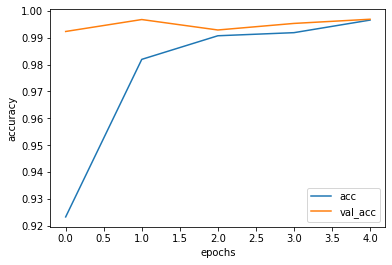

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(["acc", "val_acc"], loc ="lower right")
plt.xlabel('epochs')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

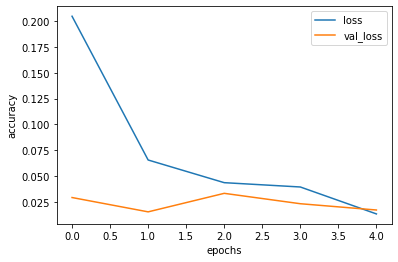

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["loss", "val_loss"], loc ="upper right")
plt.xlabel('epochs')
plt.ylabel('accuracy')

## Predicting on Test set

In [23]:
batch_size=32
pred= neuralnetwork_cnn.predict(test_set)
predicted_class_indices = np.argmax(pred,axis=1)

375/375 [==============================] - 11s 28ms/step


In [24]:
validation_set.class_indices

{'AbdomenCT': 0,
 'BreastMRI': 1,
 'CXR': 2,
 'ChestCT': 3,
 'Hand': 4,
 'HeadCT': 5}

In [25]:
labels = (test_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [26]:
filenames=test_set.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})

## Displaying the category of image and predicted image

In [27]:
display(results.sample(10))


,Filename,Predictions
6080,ChestCT/000427.jpeg,AbdomenCT
452,AbdomenCT/002189.jpeg,AbdomenCT
10930,HeadCT/004595.jpeg,HeadCT
4506,CXR/002480.jpeg,CXR
6138,ChestCT/000690.jpeg,ChestCT
11438,HeadCT/007150.jpeg,HeadCT
10279,HeadCT/001433.jpeg,HeadCT
11129,HeadCT/005655.jpeg,HeadCT
8557,Hand/002675.jpeg,Hand
10202,HeadCT/001082.jpeg,HeadCT


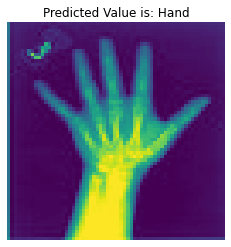

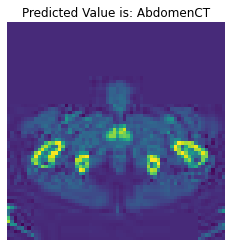

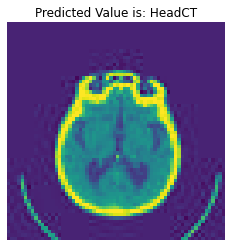

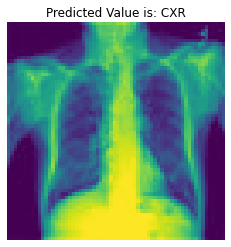

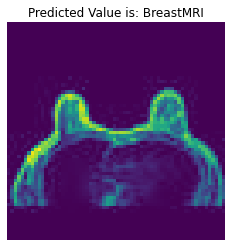

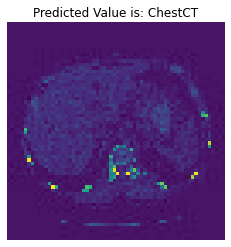

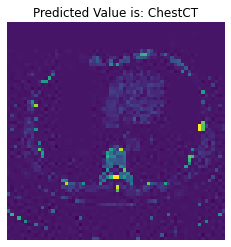

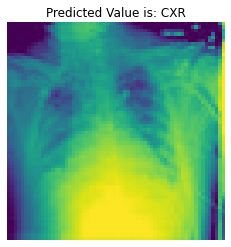

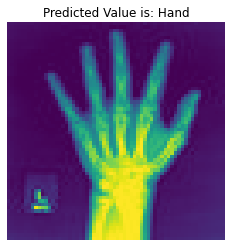

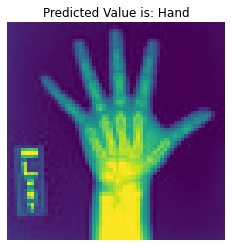

In [28]:
for i in results.sample(10).index:
  image = plt.imread(os.path.join(test_dir, results['Filename'][i]))
  fig, ax = plt.subplots()
  ax.imshow(image)
  plt.title('Predicted Value is: ' + results['Predictions'][i])
  plt.axis('off')
  plt.show()